# Introduction 


![alt text](https://techcrunch.com/wp-content/uploads/2017/08/anti-hate.jpg)

This notebook provides a demo to use the methods used in the paper with new data. If new to collaboratory ,please check the following [link](https://medium.com/lean-in-women-in-tech-india/google-colab-the-beginners-guide-5ad3b417dfa) to know how to run the code.

### Import the required libraries:

In [0]:
#import 

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os
import joblib
import json
import pandas as pd
import numpy as np

###ipywigets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


from sklearn import *
from sklearn.model_selection import *
from sklearn.metrics import *

import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#copy the git clone address here 
 
!git clone https://github.com/binny-mathew/Countering_Hate_Speech.git   
#Best binary classifier was XGBclassifier 
#Best multilabel classifier was XGBclassifier

best_binary_classifier = joblib.load('Countering_Hate_Speech/Best_model/XGB_classifier_task_1.joblib.pkl')
best_multiclass_classifier = joblib.load('Countering_Hate_Speech/Best_model/XGB_classifier_task_3.joblib.pkl')
best_black_classifier = joblib.load('Countering_Hate_Speech/Best_model/black_XGB_classifier_task_2.joblib.pkl')
best_jew_classifier = joblib.load('Countering_Hate_Speech/Best_model/jew_XGB_classifier_task_2.joblib.pkl')
best_lgbt_classifier = joblib.load('Countering_Hate_Speech/Best_model/lgbt_XGB_classifier_task_2.joblib.pkl')



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator _ConstantPredictor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator OneVsRestClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at y

###Word Embeddings Loaded Here

In [0]:
####downloading the word embeddings
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip glove.840B.300d.zip
####extracting the glove model file   
#import zipfile
#archive = zipfile.ZipFile('glove.840B.300d.zip', 'r')
GLOVE_MODEL_FILE ='glove.840B.300d.txt'


import numpy as np

## change the embedding dimension according to the model
EMBEDDING_DIM = 300
###change the method type


### method two
def loadGloveModel2(glove_file):
    tmp_file = get_tmpfile("test_crawl_200.txt")

    # call glove2word2vec script
    # default way (through CLI): python -m gensim.scripts.glove2word2vec --input <glove_file> --output <w2v_file>
    glove2word2vec(glove_file, tmp_file)
    model=KeyedVectors.load_word2vec_format(tmp_file)
    return model




--2019-03-28 11:17:48--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2019-03-28 11:17:48--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  6.61MB/s    in 5m 19s  

2019-03-28 11:23:07 (6.52 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [0]:
word2vec_model = loadGloveModel2(GLOVE_MODEL_FILE)

## Dataset is loaded here

In [0]:
#@title Select the type of file used 

type_of_file = 'X.json' #@param ['X.json','X.csv']

### File type information

If the file type is **.json** then each element should contain the following fields:-
1.   Community
2.   CounterSpeech
3.   Category
4.   commentText
5.   id

If the file type is **.csv** then it must have the following columns:-
1.   Community
2.   CounterSpeech
3.   Category
4.   commentText
5.   id


Note:- If you don't have the Category or  Community add an dummy element or column 

In [0]:
####CHANGE THE PATH OF THE FILE
path_of_file='Countering_Hate_Speech/Data/Counterspeech_Dataset.json'

def convert_class_label(input_text):
    if input_text:
        return 'counter'
    else:
        return 'noncounter'



if(type_of_file=='X.json'):
      with open(path_of_file) as fp:
            train_data = json.load(fp)
      pd_train = pd.DataFrame(columns=['id','class','community','category','text'])

      for count, each in enumerate(train_data):
          try:
              pd_train.loc[count]  = [each['id'], convert_class_label(each['CounterSpeech']), each['Community'],each['Category'],each['commentText']]
          except:
              pass
      print('Training Data Loading Completed...')
elif(type_of_file=='X.csv'):
      pd_train=pd.read_csv(path_of_the_file)
      
pd_train.head()            

Training Data Loading Completed...


,id,class,community,category,text
0,Ugw-_mfnTo9SUniGGTN4AaABAg,noncounter,jews,Default,she is one of the last brave white women with ...
1,UgiMOgO3u4akkngCoAEC,noncounter,lgbt,Default,AMEN PASTOR!!!!!!!!
2,UgzemCMbg-ri1ri7sCt4AaABAg,counter,jews,"2,8",What kind of God is it that Hates people & Cur...
3,UghFhzrURF1svHgCoAEC,counter,jews,8,Question - Which comment is racist and why?\n ...
4,Ugzr50sQdH0Ictuex214AaABAg,counter,jews,8,That Israel fail that is nothing new. That Isr...


In [0]:
#@title How your dataframe should look like after extraction {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

path_of_data_file='Countering_Hate_Speech/Data/Counterspeech_Dataset.json'

def convert_class_label(input_text):
    if input_text:
        return 'counter'
    else:
        return 'noncounter'
with open(path_of_data_file) as fp:
      train_data = json.load(fp)
pd_train_sample = pd.DataFrame(columns=['id','class','community','category','text'])

for count, each in enumerate(train_data):
    try:
        pd_train_sample.loc[count]  = [each['id'], convert_class_label(each['CounterSpeech']), each['Community'],each['Category'],each['commentText']]
    except:
        pass
print('Training Data Loading Completed...')
pd_train_sample.head()

Training Data Loading Completed...


,id,class,community,category,text
0,Ugw-_mfnTo9SUniGGTN4AaABAg,noncounter,jews,Default,she is one of the last brave white women with ...
1,UgiMOgO3u4akkngCoAEC,noncounter,lgbt,Default,AMEN PASTOR!!!!!!!!
2,UgzemCMbg-ri1ri7sCt4AaABAg,counter,jews,"2,8",What kind of God is it that Hates people & Cur...
3,UghFhzrURF1svHgCoAEC,counter,jews,8,Question - Which comment is racist and why?\n ...
4,Ugzr50sQdH0Ictuex214AaABAg,counter,jews,8,That Israel fail that is nothing new. That Isr...


In [0]:
pd_train['text'].replace('', np.nan, inplace=True)
pd_train.dropna(subset=['text'], inplace=True)

In [0]:
import sys

####features module has the necessary function for feature generation 
from Countering_Hate_Speech.utils import features
from Countering_Hate_Speech.utils import multi_features
###tokenize module has the tokenization funciton
from Countering_Hate_Speech.utils.tokenize import *
###helper prints confusion  matrix and stores results
from Countering_Hate_Speech.utils.helper import *
###common preprocessing imports
from Countering_Hate_Speech.utils.commen_preprocess import *


....start....cleaning


W0328 11:47:01.342070 140315258214272 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


Instructions for updating:
Colocations handled automatically by placer.


W0328 11:47:18.272865 140315258214272 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


#### Next few sections cover three different classifiers  namely - 

*   Binary classification 
*   Multlabel classification
*   Cross community 

You can run the cells corresponding to the result you want to analyse.



### **Binary Classification**

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0328 11:47:43.327548 140315258214272 saver.py:1483] Saver not created because there are no variables in the graph to restore


ending


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fifti'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


You can download the files from the file directory now 


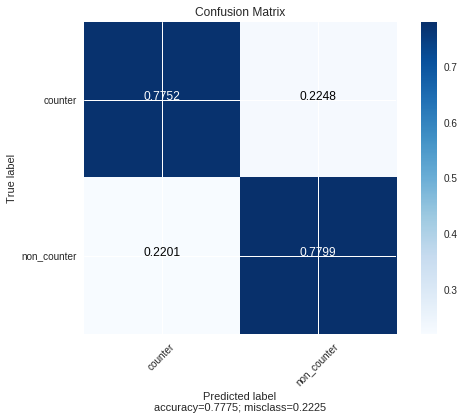

In [0]:
X,y= features.combine_tf_rem_google_rem_embed(pd_train,word2vec_model)

label_map = {
        'counter': 0,
        'noncounter': 1
    }
temp=[]
for data in y:
        temp.append(label_map[data])

y=np.array(temp)


y_pred=best_binary_classifier.predict(X)
report = classification_report(y, y_pred)
cm=confusion_matrix(y, y_pred)
plt=plot_confusion_matrix(cm,normalize= True,target_names = ['counter','non_counter'],title = "Confusion Matrix")
plt.savefig('Confusion_matrix.png')
df_result=pandas_classification_report(y,y_pred)
df_result.to_csv('Classification_Report.csv',  sep=',')
print("You can download the files from the file directory now ")

### **Multilabel Classification**

In [0]:
import scipy

pd_train_multilabel =pd_train.copy()
pd_train_multilabel =pd_train_multilabel[pd_train_multilabel['category']!='Default']
list1=[[],[],[],[],[],[],[],[],[],[]]
for ele in pd_train_multilabel['category']:
    temp=[]
    if type(ele) is int:
        ele =str(ele)
    for i in range(0,len(ele),2):
        temp.append(ord(ele[i])-ord('0'))
    #print(temp)
    if(len(temp)==0):
        print(temp)
    for i in range(0,10):
        if i+1 in temp:
            list1[i].append(1)
        else:
            list1[i].append(0)
y_train=np.array([np.array(xi) for xi in list1])

### final dataframe for the task created 
pd_train_multilabel = pd.DataFrame({'text':list(pd_train_multilabel['text']),'cat0':list1[0],'cat1':list1[1],'cat2':list1[2],'cat3':list1[3],'cat4':list1[4],'cat5':list1[5],'cat6':list1[6],'cat7':list1[7],'cat8':list1[8],'cat9':list1[9]})
### drop the entries having blank entries
pd_train_multilabel['text'].replace('', np.nan, inplace=True)
pd_train_multilabel.dropna(subset=['text'], inplace=True)





X,y= multi_features.combine_tf_rem_google_rem_embed(pd_train_multilabel,word2vec_model)
path='multilabel_res'
os.makedirs(path, exist_ok=True)
X = np.array(X)
y = np.array(y)
y_pred = best_multiclass_classifier.predict(X)
if(scipy.sparse.issparse(y_pred)):
   ham,acc,pre,rec,f1=calculate_score(y,y_pred.toarray())
   accuracy_test=accuracy_score(y,y_pred.toarray())

else:
   ham,acc,pre,rec,f1=calculate_score(y,y_pred)
   accuracy_test=my_accuracy_score(y,y_pred)

  
for i in range(10):
    df_result=pandas_classification_report(y[:,i],y_pred[:,i])
    df_result.to_csv(path+'/report'+str(i)+'.csv')


f = open(path+'/final_report.txt', "w")
f.write("best_model")  
f.write("The hard metric score is :- " + str(accuracy_test))
f.write("The accuracy is :- " + str(acc))
f.write("The precision is :- " + str(pre))
f.write("The recall is :- " + str(rec))
f.write("The f1_score is :- " + str(f1))
f.write("The hamming loss is :-" + str(ham))
f.close()
  
    
!zip -r mulitlabel_results.zip multilabel_res


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0328 12:13:22.785738 140315258214272 saver.py:1483] Saver not created because there are no variables in the graph to restore


ending


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fifti'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


  adding: multilabel_res/ (stored 0%)
  adding: multilabel_res/report9.csv (deflated 33%)
  adding: multilabel_res/report3.csv (deflated 40%)
  adding: multilabel_res/report7.csv (deflated 39%)
  adding: multilabel_res/report6.csv (deflated 36%)
  adding: multilabel_res/report2.csv (deflated 38%)
  adding: multilabel_res/report1.csv (deflated 39%)
  adding: multilabel_res/report0.csv (deflated 38%)
  adding: multilabel_res/final_report.txt (deflated 35%)
  adding: multilabel_res/report8.csv (deflated 40%)
  adding: multilabel_res/report5.csv (deflated 33%)
  adding: multilabel_res/report4.csv (deflated 39%)


### **Cross CommunityClassification**

In [0]:
pd_cross=pd_train.copy()
part_j=pd_cross.loc[pd_train['community']=='jews']
part_b=pd_cross.loc[pd_train['community']=='black']
part_l=pd_cross.loc[pd_train['community']=='lgbt']
X_black,y_black= features.combine_tf_rem_google_rem_embed(part_b,word2vec_model)
X_jew,y_jew= features.combine_tf_rem_google_rem_embed(part_j,word2vec_model)
X_lgbt,y_lgbt= features.combine_tf_rem_google_rem_embed(part_l,word2vec_model)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0328 13:36:00.798877 140315258214272 saver.py:1483] Saver not created because there are no variables in the graph to restore


ending


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['fifti'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0328 13:36:40.198019 140315258214272 saver.py:1483] Saver not created because there are no variables in the graph to restore


ending
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0328 13:37:38.361577 140315258214272 saver.py:1483] Saver not created because there are no variables in the graph to restore


ending


You can download the files from the file directory now 


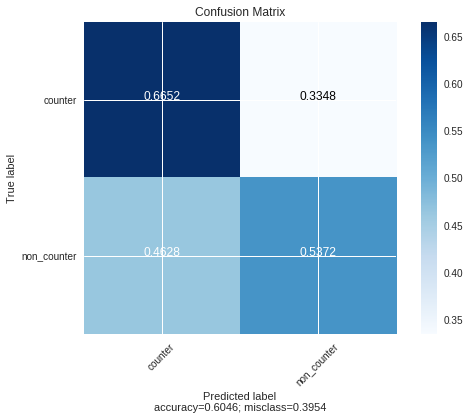

In [0]:
label_map = {
        'counter': 0,
        'noncounter': 1
    }
temp=[]
for data in y_black:
        temp.append(label_map[data])

y_black=np.array(temp)


y_pred_black=best_black_classifier.predict(X_black)
report = classification_report(y_black, y_pred_black)
cm=confusion_matrix(y_black, y_pred_black)
plt=plot_confusion_matrix(cm,normalize= True,target_names = ['counter','non_counter'],title = "Confusion Matrix")
plt.savefig('black_Confusion_matrix.png')
df_result=pandas_classification_report(y_black,y_pred_black)
df_result.to_csv('black_Classification_Report.csv',  sep=',')
print("You can download the files from the file directory now ")

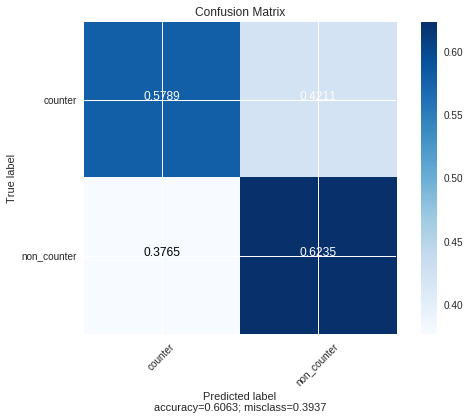

In [0]:
label_map = {
        'counter': 0,
        'noncounter': 1
    }
temp=[]
for data in y_jew:
        temp.append(label_map[data])

y_jew=np.array(temp)


y_pred_jew=best_jew_classifier.predict(X_jew)
report = classification_report(y_jew, y_pred_jew)
cm=confusion_matrix(y_jew, y_pred_jew)
plt=plot_confusion_matrix(cm,normalize= True,target_names = ['counter','non_counter'],title = "Confusion Matrix")
plt.savefig('jew_Confusion_matrix.png')
df_result=pandas_classification_report(y_jew,y_pred_jew)
df_result.to_csv('jew_Classification_Report.csv',  sep=',')
print("You can download the files from the file directory now ")

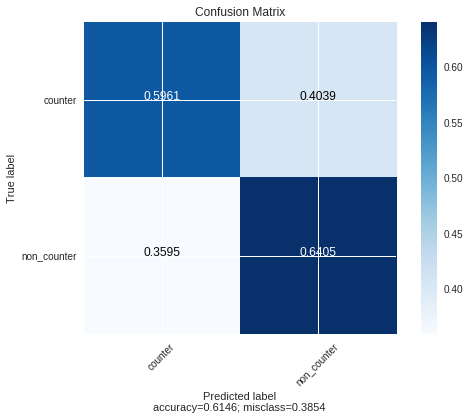

In [0]:
label_map = {
        'counter': 0,
        'noncounter': 1
    }
temp=[]
for data in y_lgbt:
        temp.append(label_map[data])

y_lgbt=np.array(temp)


y_pred_lgbt=best_lgbt_classifier.predict(X_lgbt)
report = classification_report(y_lgbt, y_pred_lgbt)
cm=confusion_matrix(y_lgbt, y_pred_lgbt)
plt=plot_confusion_matrix(cm,normalize= True,target_names = ['counter','non_counter'],title = "Confusion Matrix")
plt.savefig('lgbt_Confusion_matrix.png')
df_result=pandas_classification_report(y_lgbt,y_pred_lgbt)
df_result.to_csv('lgbt_Classification_Report.csv',  sep=',')
print("You can download the files from the file directory now ")